## Group Project
### Brandon Carp, Shyan DasMadan, Sam Gunther, Prafulla Ranjan Dash

As a journalism department, our task is to provide insights into why certain foreign labor cases are __denied__ and provide recommendations on what to avoid when applying in easy to understand visualizations as well as other forms of consumption.

In [81]:
import pandas as pd

df = pd.read_excel("PERM_FY2020_Q3.xlsx")

# filter case statuses that are not withdrawn as including them could lead to misleading insights
df = df[df.CASE_STATUS != 'Withdrawn']

# create binary variables between cases that are denied vs certified
# denied cases will have a binary variable of 1 while certified cases will have a binary variable of 0
case_status = []
case_status_binary = []
for i in df.CASE_STATUS:
    if i == 'Denied':
        case_status.append('Denied')
        case_status_binary.append(1)
    else:
        case_status.append('Certified')
        case_status_binary.append(0)
        
df['CASE_STATUS'] = case_status
df['CASE_STATUS_BINARY'] = case_status_binary

df.head()

CASE_NUMBER CASE_STATUS RECEIVED_DATE       DECISION_DATE REFILE  \
0  A-09245-62715      Denied    2009-09-03 2020-04-30 14:50:29      N   
1  A-10119-96737    Certfied    2010-03-29 2019-10-18 11:34:37      Y   
2  A-10225-13679      Denied    2010-08-10 2020-04-30 07:55:08      N   
3  A-11033-51540    Certfied    2011-02-03 2020-05-28 08:38:56      N   
4  A-11074-62984      Denied    2011-03-10 2020-06-17 07:50:52      N   

  ORIG_FILE_DATE PREVIOUS_SWA_CASE_NUMBER_STATE SCHD_A_SHEEPHERDER  \
0            NaT                            NaN                  N   
1     2000-09-15                       MARYLAND                  N   
2            NaT                            NaN                  N   
3            NaT                            NaN                  N   
4            NaT                            NaN                  N   

                 EMPLOYER_NAME        EMPLOYER_ADDRESS_1 EMPLOYER_ADDRESS_2  \
0       SATURN ENTERPRISES INC      2340 N WASHTENAW AVE                NaN   
1                   FIL PARONG         13528 JAMIESON PL                NaN   
2     GLENNS PLUMBING SERVICES         854 CUSTER STREET                NaN   
3      SKILLNET SOLUTIONS INC.  1901 SOUTH BASCOM AVENUE          SUITE 600   
4  R    L  CONSTRUCTION,  INC.    904  NEPPERHAN  AVENUE                NaN   

      EMPLOYER_CITY EMPLOYER_STATE_PROVINCE          EMPLOYER_COUNTRY  \
0           CHICAGO                ILLINOIS  UNITED STATES OF AMERICA   
1        GERMANTOWN                MARYLAND  UNITED STATES OF AMERICA   
2  N. VALLEY STREAM                NEW YORK  UNITED STATES OF AMERICA   
3          CAMPBELL              CALIFORNIA  UNITED STATES OF AMERICA   
4           YONKERS                NEW YORK  UNITED STATES OF AMERICA   

  EMPLOYER_POSTAL_CODE  EMPLOYER_PHONE EMPLOYER_PHONE_EXT  \
0                60647      7732769550                NaN   
1                20874    301-515-8079                NaN   
2                11580    516-561-3692                NaN   
3                95008    408-523-6225                NaN   
4                10703  (914) 423-2400                NaN   

   EMPLOYER_NUM_EMPLOYEES  EMPLOYER_YEAR_COMMENCED_BUSINESS NAICS_CODE  \
0                     2.0                            1998.0      23611   
1                     0.0                            2009.0     531110   
2                     3.0                            2002.0        NaN   
3                    29.0                            1996.0     519190   
4                    43.0                            1987.0     236115   

  FW_OWNERSHIP_INTEREST     EMP_CONTACT_NAME   EMP_CONTACT_ADDRESS_1  \
0                     N  zygmunt f oparowski    2340 n washtenaw ave   
1                     N          FIL  PARONG       13528 JAMIESON PL   
2                     N         DAVID  GLENN       854 CUSTER STREET   
3                     N         Jack  Grover       1151 Sonora Court   
4                     N   RITA  O ' SULLIVAN  904  NEPPERHAN  AVENUE   

  EMP_CONTACT_ADDRESS_2  EMP_CONTACT_CITY EMP_CONTACT_STATE_PROVINCE  \
0                   NaN           chicago                   ILLINOIS   
1                   NaN        GERMANTOWN                   MARYLAND   
2                   NaN  N. VALLEY STREAM                   NEW YORK   
3               Suite 2         Sunnyvale                 CALIFORNIA   
4                   NaN           YONKERS                   NEW YORK   

        EMP_CONTACT_COUNTRY EMP_CONTACT_POSTAL_CODE EMP_CONTACT_PHONE  \
0  UNITED STATES OF AMERICA                   60647        7732769550   
1  UNITED STATES OF AMERICA                   20874   (301) 515-8079    
2  UNITED STATES OF AMERICA                   11580     516-561-3692    
3  UNITED STATES OF AMERICA                   94086     408-523-6225    
4  UNITED STATES OF AMERICA                   10703   (914) 423-2400    

              EMP_CONTACT_EMAIL     AGENT_ATTORNEY_NAME  \
0  saturn_enterprises@yahoo.com  Christopher E Kurczaba

In [82]:
# total number of rows and columns
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

n = df.CASE_NUMBER.count()

Number of Rows: 69117
Number of Columns: 155


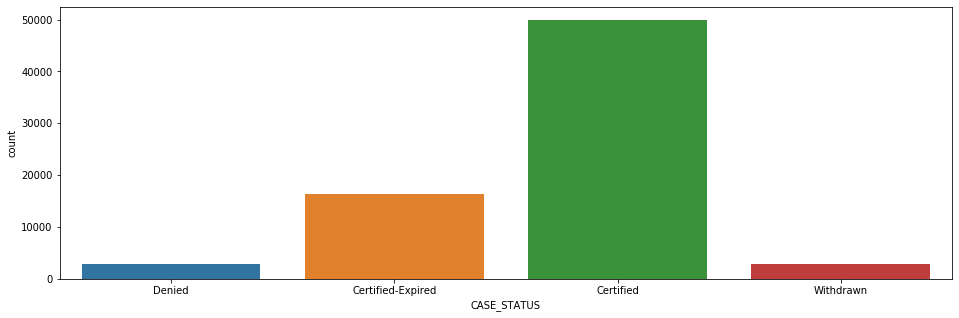

In [15]:
# total number of cases binned by case status bucket
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 5)
sns.countplot(x = 'CASE_STATUS', data = df)

In [12]:
# check to see if there are disparate relationships between case statuses and the type of building an employer works in
df['BUILDING_BOOL'] = pd.isna(df.loc[:, ('EMPLOYER_ADDRESS_2')])
df.head()

CASE_NUMBER        CASE_STATUS RECEIVED_DATE       DECISION_DATE REFILE  \
0  A-09245-62715             Denied    2009-09-03 2020-04-30 14:50:29      N   
1  A-10119-96737  Certified-Expired    2010-03-29 2019-10-18 11:34:37      Y   
2  A-10225-13679             Denied    2010-08-10 2020-04-30 07:55:08      N   
3  A-11033-51540          Certified    2011-02-03 2020-05-28 08:38:56      N   
4  A-11074-62984             Denied    2011-03-10 2020-06-17 07:50:52      N   

  ORIG_FILE_DATE PREVIOUS_SWA_CASE_NUMBER_STATE SCHD_A_SHEEPHERDER  \
0            NaT                            NaN                  N   
1     2000-09-15                       MARYLAND                  N   
2            NaT                            NaN                  N   
3            NaT                            NaN                  N   
4            NaT                            NaN                  N   

                 EMPLOYER_NAME        EMPLOYER_ADDRESS_1  ...  \
0       SATURN ENTERPRISES INC      2340 N WASHTENAW AVE  ...   
1                   FIL PARONG         13528 JAMIESON PL  ...   
2     GLENNS PLUMBING SERVICES         854 CUSTER STREET  ...   
3      SKILLNET SOLUTIONS INC.  1901 SOUTH BASCOM AVENUE  ...   
4  R    L  CONSTRUCTION,  INC.    904  NEPPERHAN  AVENUE  ...   

  FOREIGN_WORKER_EXP_WITH_EMPL FOREIGN_WORKER_EMPL_PAY_FOR_ED  \
0                            N                              N   
1                            N                              N   
2                            N                              N   
3                            N                              N   
4                            N                              N   

  FOREIGN_WORKER_CURR_EMPLOYED EMPLOYER_COMPLETED_APPLICATION  \
0                            N                              N   
1                            N                              N   
2                            N                              N   
3                            Y                              N   
4                            N                              N   

            PREPARER_NAME   PREPARER_TITLE                 PREPARER_EMAIL  \
0  Christopher E Kurczaba         Attorney      kurczabalaw@sbcglobal.net   
1          WINSTON W TSAI  ATTORNEY AT LAW            WINSTONTSAI@AOL.COM   
2       DANIEL J SULLIVAN         ATTORNEY                   GWG8@AOL.COM   
3           Sonal  Kinger  Attorney at Law  sonal.kinger@bakerlawcorp.com   
4         DENISE S DUTTON      NONATTORNEY                            NaN   

   EMP_INFO_DECL_NAME           EMP_INFO_DECL_TITLE BUILDING_BOOL  
0  Zygmunt  Oparowski                     President          True  
1         FIL  PARONG             HEAD OF HOUSEHOLD          True  
2        DAVID  GLENN                         OWNER          True  
3        Jack  Grover  VP of Finance and Operations         False  
4   RITA  O  SULLIVAN                       MANAGER          True  

[5 rows x 155 columns]

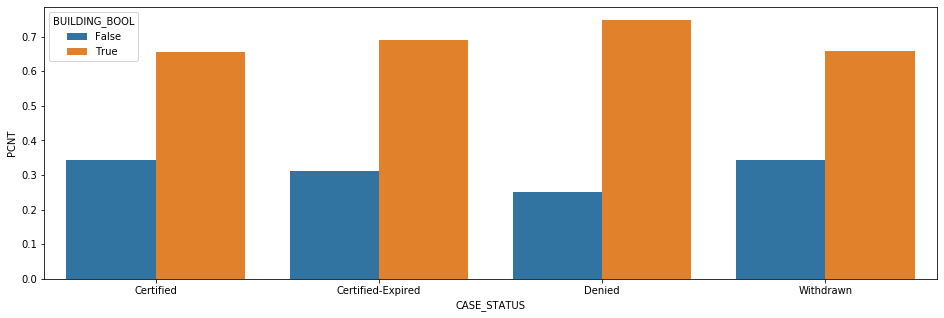

In [37]:
df_building_bool = df[['BUILDING_BOOL', 'CASE_STATUS',
                       'CASE_NUMBER']].groupby(['CASE_STATUS','BUILDING_BOOL']).agg('count').reset_index()

df_building_bool_total = df[['CASE_STATUS','CASE_NUMBER']].groupby(['CASE_STATUS']).agg('count').reset_index()
df_building_bool_total.head()

df_temp = df_building_bool.merge(df_building_bool_total, on = 'CASE_STATUS').rename(columns={'CASE_NUMBER_x':'COUNT',
                                                                                    'CASE_NUMBER_y':'TOTAL'})
df_temp['PCNT'] = df_temp.COUNT / df_temp.TOTAL
df_temp

sns.barplot(x = 'CASE_STATUS', y = 'PCNT', hue = 'BUILDING_BOOL', data = df_temp)

In [69]:
state_list = []

for i in df.EMP_CONTACT_STATE_PROVINCE:
    word = str(i).upper().strip()
    if ('ALABAMA' in word) or (word == 'AL'):
        state_list.append('ALABAMA')
    else:
        state_list.append(word)
        
state_list

['ILLINOIS',
 'MARYLAND',
 'NEW YORK',
 'CALIFORNIA',
 'NEW YORK',
 'MASSACHUSETTS',
 'ILLINOIS',
 'VERMONT',
 'NEW YORK',
 'CONNECTICUT',
 'TEXAS',
 'GUAM',
 'NEW JERSEY',
 'TEXAS',
 'NEW JERSEY',
 'CALIFORNIA',
 'GEORGIA',
 'ILLINOIS',
 'CALIFORNIA',
 'WASHINGTON',
 'NEW YORK',
 'MICHIGAN',
 'VERMONT',
 'CALIFORNIA',
 'ILLINOIS',
 'MASSACHUSETTS',
 'NEW YORK',
 'ILLINOIS',
 'NEW JERSEY',
 'CALIFORNIA',
 'NEW YORK',
 'ILLINOIS',
 'FLORIDA',
 'INDIANA',
 'NEW YORK',
 'NEW JERSEY',
 'ARIZONA',
 'NEW JERSEY NEW JERSEY',
 'VIRGINIA',
 'COLORADO',
 'ILLINOIS',
 'ILLINOIS',
 'FLORIDA',
 'MICHIGAN',
 'VIRGINIA FAIR FAX COUNTY',
 'NEW YORK',
 'WISCONSIN',
 'MISSOURI',
 'CALIFORNIA',
 'TENNESSEE',
 'LOUISIANA',
 'CALIFORNIA',
 'FLORIDA',
 'VIRGINIA',
 'TEXAS',
 'NEW JERSEY NJ',
 'NEW JERSEY',
 'CALIFORNIA',
 'NORTH CAROLINA',
 'MICHIGAN',
 'ILLINOIS',
 'MICHIGAN',
 'MARYLAND',
 'PENNSYLVANIA',
 'FLORIDA',
 'NEVADA',
 'NEW YORK',
 'MICHIGAN',
 'VIRGINIA',
 'OHIO',
 'FLORIDA',
 'MARYLAND',
 'COL

In [63]:
pd.set_option('display.max_rows', None)
df_temp = df[['CASE_STATUS','EMP_CONTACT_STATE_PROVINCE',
    'CASE_NUMBER']].groupby(['CASE_STATUS','EMP_CONTACT_STATE_PROVINCE']).agg('count').reset_index()
df_temp
#plt.rcParams['figure.figsize'] = (16, 20)
#sns.heatmap(pd.crosstab(df_temp.EMP_CONTACT_STATE_PROVINCE,df_temp.CASE_STATUS))

CASE_STATUS                         EMP_CONTACT_STATE_PROVINCE  \
0             Certified                                                 CA   
1             Certified                                                 MA   
2             Certified                                                 SK   
3             Certified                                                 TX   
4             Certified                                                 VA   
5             Certified                                            ALABAMA   
6             Certified                                      ALABAMA 35490   
7             Certified                                         ALABAMA AL   
8             Certified                                    ALABAMA ALABAMA   
9             Certified                              ALABAMA AUTORICA, LLC   
10            Certified                                    ALABAMA Alabama   
11            Certified                         ALABAMA Green Branch Farms   
12            Certified                         ALABAMA Shelby OBGYN, P.C.   
13            Certified                                     ALABAMA retail   
14            Certified                                             ALASKA   
15            Certified                                            ARIZONA   
16            Certified                                         ARIZONA AZ   
17            Certified                                      ARIZONA Avnet   
18            Certified                                ARIZONA Carvana LLC   
19            Certified               ARIZONA Desert Bloom Family Medicine   
20            Certified  ARIZONA Law Offices of Brelje and Associates, ...   
21            Certified                                   ARIZONA Maricopa   
22            Certified                            ARIZONA The ILS Company   
23            Certified                                           ARKANSAS   
24            Certified                                        ARKANSAS AR   
25            Certified                                  ARKANSAS Arkansas   
26            Certified                      ARKANSAS NOW Diagnostics, Inc   
27            Certified                                   ARKANSAS SurfTec   
28            Certified                                         CALIFORNIA   
29            Certified                                    CALIFORNIA 1953   
30            Certified                                    CALIFORNIA 2017   
31            Certified                                   CALIFORNIA 90010   
32            Certified                                   CALIFORNIA 91731   
33            Certified                                   CALIFORNIA 92130   
34            Certified                                   CALIFORNIA 93720   
35            Certified                                   CALIFORNIA 94544   
36            Certified                                 CALIFORNIA ALAMEDA   
37            Certified                          CALIFORNIA Alameda County   
38            Certified                        CALIFORNIA Anchor Audio Inc   
39            Certified                       CALIFORNIA Barefoot Networks   
40            Certified                   CALIFORNIA Betabrand Corporation   
41            Certified                                CALIFORNIA Bill.com   
42            Certified                                      CALIFORNIA CA   
43            Certified                         CALIFORNIA CA - California   
44            Certified                              CALIFORNIA CALIFORNIA   
45            Certified                              CALIFORNIA California   
46            Certified                         CALIFORNIA California (CA)   
47            Certified                CALIFORNIA Clarify Health Solutions   
48            Certified                           CALIFORNIA CrowdAI, Inc.   
49            Certified                             CALIFORNIA Cutera, Inc   
50            Certified           